##  Programming Exercise: Logistic Regression

### DS 5220 - Omer Seyfeddin Koc

In this exercise, you will build a logistic regression model to predict whether a student gets admitted into a university. 

Suppose that you are the administrator of a university department and you want to determine each applicant’s chance of admission based on their results on two exams. You have historical data from previous applicants that you can use as a training set for logistic regression. For each training example, you have the applicant’s scores on two exams and the admissions decision. Your task is to build a classification model that estimates an applicant’s probability of admission based the scores from those two exams.

### 1. Loading the Data

In [1]:
# Import required library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Read data
df = pd.read_csv('exams_data.txt', header=None)
df.columns = ['exam_score_1', 'exam_score_2', 'admitted']
df.head()

,exam_score_1,exam_score_2,admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [3]:
# Initialize some useful values
m = df.shape[0] # number of training samples
X = np.hstack((np.ones((m, 1)), df[['exam_score_1', 'exam_score_2']].values))
y = np.array(df['admitted'].values)

In [4]:
# The metrics of the data set were checked to give an idea.
df.describe()

,exam_score_1,exam_score_2,admitted
count,100.000000,100.000000,100.000000
mean,65.644274,66.221998,0.600000
std,19.458222,18.582783,0.492366
min,30.058822,30.603263,0.000000
25%,50.919511,48.179205,0.000000
50%,67.032988,67.682381,1.000000
75%,80.212529,79.360605,1.000000
max,99.827858,98.869436,1.000000


### 2. Visualizing the Data

In [5]:
def plot_data(X, y):
    """ Plots the data points X and y with + for the positive examples and . for the negative examples. 
        X is assumed to be a mx3 matrix.
    """
  
    # ====================== YOUR CODE HERE ====================================
    # Plot data points
    plt.figure(figsize=(6,4))
    
    # These expressions select the first and second columns of the exam scores of the samples in the matrix X.
    # For admitted score, color is green.
    plt.scatter(X[y==1, 1], X[y==1, 2], marker='+', label='Admitted', s=40, c='green')
    
    # For not admitted score, color is red.
    plt.scatter(X[y==0, 1], X[y==0, 2], marker='.', label='Not Admitted', s=40, c='red')

    # Add labels and legend
    plt.title('Scatter plot of data')
    plt.xlabel('Exam Score 1')
    plt.ylabel('Exam Score 2')
    plt.legend()
    
    # Show the plot
    plt.show()
    # =========================================================================

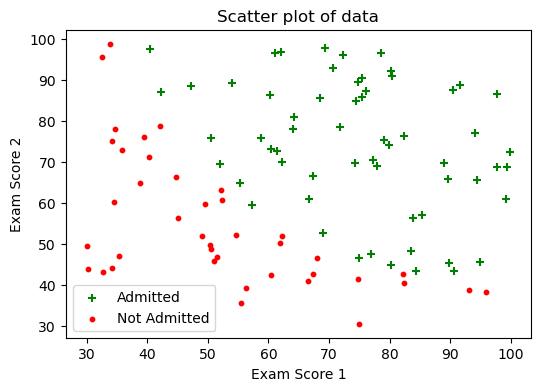

In [6]:
# Plot data
plot_data(X, y)

### 3. Model Implementation

Logistic regression hypothesis: 

$$h_\theta(x) = g(\theta^Tx)$$

$$g(z) = \frac{1}{1+e^{-z}}$$

#### 3.1 Sigmoid function

In [7]:
def sigmoid(z):
    """ g = sigmoid(z) computes the sigmoid of z (z can be a scalar, vector or a matrix).
    """
    # ====================== YOUR CODE HERE =======================
    # define z
    z = np.array(z)
    
    # np.exp used for euler's number
    return (1 / (1+np.exp(-z)))
    # =============================================================

In [8]:
sigmoid([0, 0.1, 0.5, 0.9, 1])

array([0.5       , 0.52497919, 0.62245933, 0.7109495 , 0.73105858])

#### 3.2 Cost function and gradient

Cost function in logistic regression is:

$$J(\theta) = -\frac{1}{m}\sum_{i=1}^m[y^i log(h_\theta(x^i))+(1-y^i)log(1-h_\theta(x^i))]$$

Vectorized implementation:

$h = g(X\theta)$

$J(\theta) = \frac{1}{m}(-y^T log(h)-(1-y)^Tlog(1-h))$



The gradient of the cost is a vector of the same length as $\theta$ where $j^{th}$ element (for $j=0,1,...,n$) is defined as follows:

$$\nabla J(\theta) = \frac{1}{m} \sum_{i=1}^m ((h_\theta(x^i) - y^i) \cdot x_j^i)$$

Vectorized:
$\nabla J(\theta) = \frac{1}{m} \cdot X^T \cdot (g(X\theta)-y)$

In [9]:
# Compute cost and gradient for logistic regression
def cost_function(theta, X, y):
    """ J, grad = cost_function(theta, X, y) computes the cost of using theta as the parameter 
        for logistic regression and the gradient of the cost w.r.t. to the parameters.
    """

    # You need to return the following variables correctly 
    J = 0
    grad = np.zeros(len(theta))
  
    # ====================== YOUR CODE HERE ====================================
    # Instructions: Compute the cost of a particular choice of theta.
    #               You should set J to the cost.
    #               Compute the partial derivatives and set grad to the partial
    #               derivatives of the cost w.r.t. each parameter in theta
    #
    # Note: grad should have the same dimensions as theta
    #
    # DIMENSIONS: 
    #   theta = (n+1) x 1
    #   X     = m x (n+1)
    #   y     = m x 1
    #   grad  = (n+1) x 1
    #   J     = Scalar
    
    # number of samples
    m = len(y)
    
    # define h function
    h=sigmoid(X @ theta)
    
    # define J (cost) function
    J = (-1/m) * np.sum(y * np.log(h) + (1-y) * np.log(1 - h))
    
    # define gradient to calculates the gradient of the cost function.  
    grad = (1/m) * X.T @ (h - y)
    # =========================================================================
    return J, grad

In [10]:
initial_theta = np.zeros(shape=(X.shape[1]))
cost, grad = cost_function(initial_theta, X, y)

print('Cost at initial theta (zeros):', cost)
print('Expected cost (approx): 0.693')
print('Gradient at initial theta (zeros):')
print(grad)
print('Expected gradients (approx):\n -0.1000\n -12.0092\n -11.2628')

Cost at initial theta (zeros): 0.6931471805599453
Expected cost (approx): 0.693
Gradient at initial theta (zeros):
[ -0.1        -12.00921659 -11.26284221]
Expected gradients (approx):
 -0.1000
 -12.0092
 -11.2628


#### 3.3 Learning parameters using an optimization solver

"Conjugate gradient", "BFGS", and "TNC (Truncated Newton)" are more sophisticated, faster ways to optimize 
 that can be used instead of gradient descent.

In [11]:
import scipy.optimize as opt

def optimize_theta(X, y, initial_theta):
    opt_results = opt.minimize(cost_function, initial_theta, args=(X, y), method='TNC',
                               jac=True, options={'maxiter':400})
    return opt_results['x'], opt_results['fun']

In [12]:
opt_theta, cost = optimize_theta(X, y, initial_theta)

/var/folders/sn/m91g82490jbfm36bn4bwq1m40000gn/T/ipykernel_13453/2329939577.py:4: DeprecationWarning: 'maxiter' has been deprecated in favor of 'maxfun' and will be removed in SciPy 1.11.0.
  opt_results = opt.minimize(cost_function, initial_theta, args=(X, y), method='TNC',


In [13]:
print('Cost at theta found by fminunc:', cost)
print('Expected cost (approx): 0.203')
print('theta:\n', opt_theta.reshape(-1,1))
print('Expected theta (approx):')
print(' -25.161\n 0.206\n 0.201')

Cost at theta found by fminunc: 0.20349770158947458
Expected cost (approx): 0.203
theta:
 [[-25.16131863]
 [  0.20623159]
 [  0.20147149]]
Expected theta (approx):
 -25.161
 0.206
 0.201


### 4. Evaluating the Model

In [14]:
prob = sigmoid(np.array([1, 45, 85]).dot(opt_theta))
print('For a student with scores 45 and 85, we predict an admission probability of', prob)
print('Expected value: 0.775 +/- 0.002')

For a student with scores 45 and 85, we predict an admission probability of 0.7762906241055562
Expected value: 0.775 +/- 0.002


#### 4.1 Accuracy on the training set

In [15]:
def predict(theta, X):
    """ Predict whether the label is 0 or 1 using learned logistic regression parameters theta
        y_pred = PREDICT(theta, X) computes the predictions for X using a threshold at 0.5 
        (i.e., if sigmoid(X @ theta) >= 0.5, predict 1)
    """
  
    # You need to return the following variables correctly
    y_pred = np.zeros(m)
  
    # ====================== YOUR CODE HERE ===================================
    # Instructions: Complete the following code to make predictions using
    #               your learned logistic regression parameters. 
    #               You should set p to a vector of 0's and 1's
    #
    # Dimentions:
    # X     =  m x (n+1)
    # theta = (n+1) x 1
    
    # Define treshold
    treshold=0.5

    # Compute the probability of admission for each example in X.
    prob = sigmoid(X @ theta)
  
    # Set the prediction to 1 if the probability is greater than or equal to treshold value.
    y_pred[prob >= treshold] = 1
    # =========================================================================
    return y_pred

In [16]:
y_pred = predict(opt_theta, X)
print(f'Train accuracy: {np.mean(y_pred == y) * 100}%')

Train accuracy: 89.0%


#### 4.2 Decision boundary

Hence,  $\theta_1 + \theta_2x_2 + \theta_3x_3 = 0$  is the equation for the decision boundary.
The equation of the boundary line is: $y = \frac{-(\theta_1+\theta_2x_2)}{\theta_3}$

In [17]:
def plot_data_with_decision_boundary(theta, X, y):
    """ Plots the training data with the decision boundary
    """
    # ====================== YOUR CODE HERE ===================================
    # Plot data points
    plt.figure(figsize=(6,4))
    
    # These expressions select the first and second columns of the exam scores of the samples in the matrix X.
    # For admitted score, color is green.
    plt.scatter(X[y==1, 1], X[y==1, 2], marker='+', label='Admitted', s=40, c='green')
    
    # For not admitted score, color is red.
    plt.scatter(X[y==0, 1], X[y==0, 2], marker='.', label='Not Admitted', s=40, c='red')
    
    # Calculate c(intercept) and m(slope)
    c = -theta[0]/theta[2]
    m = -theta[1]/theta[2]
    
    # Create x and y boundary for line
    x_boundary = np.array([np.min(X[:,1])-2, np.max(X[:,1])+2])
    y_boundary = c+m*x_boundary
    
    # Show boundary line equation
    print('Equation of the boundary line is: y=', c,m,'* x')
    
    # Plot decision boundary line
    plt.plot(x_boundary, y_boundary, label='Decision boundary')
    
    # Add labels and legend
    plt.title('Scatter plot of data with decision boundary')
    plt.xlabel('Exam Score 1')
    plt.ylabel('Exam Score 2')
    plt.legend()
    
    # Show the plot
    plt.show()
    # =========================================================================

Equation of the boundary line is: y= 124.88774018870757 -1.0236266797442384 * x


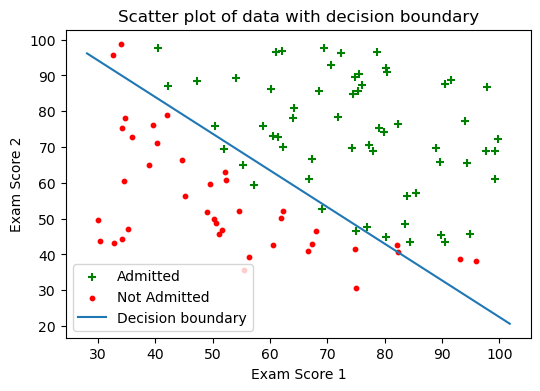

In [18]:
# Plots the training data with the decision boundary
plot_data_with_decision_boundary(opt_theta, X, y)

### Thanks! - Omer S. Koc